# Biochemistry 714 - Assessment 1 - MEMO

### General marking guidelines

- Download your own submission as well as that of the classmate which you are marking, from the course website. Refer to [this spreadsheet](https://stellenbosch-my.sharepoint.com/:x:/g/personal/jr_sun_ac_za/EUVNBCrj1FBIrP44WxqrlrcBzAryOX7TQWAjQ_gOrVXJWw) for details on who is marking which assignment. Also enter the marks on that spreadsheet.
- Use this Jupyter notebook as memo and the marks per question as per the assignment instructions.
- Every student starts out with a “full set of marks”, and one mark is deducted for every “mistake”.
- Before starting the marking, you need to **physically verify that each notebook runs without errors**. Open the notebook in Jupyter Lab and **execute each cell sequentially from top to bottom**.
- Note that you will have to use some discretion as students may have answered the questions differently and the memo cannot possibly cover all scenarios.
- Enter the mark for each question in the spreadsheet, the total is calculated automatically.

In [1]:
# preliminaries
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.misc
import scipy.stats
import pandas as pd
import os
from lmfit import Model
backupdir = os.getcwd()

### Question 1 (15 marks)

5 marks for reading in the data. Check one or two of the dataframes to verify that the data has loaded correctly.

In [2]:
a0b0 = pd.read_csv("A0B0.csv", names=["Time", "NADPH"])
a0_5b24 = pd.read_csv("A0.5B24.csv", names=["Time", "NADPH"])
a1b24 = pd.read_csv("A1B24.csv", names=["Time", "NADPH"])
a2b24 = pd.read_csv("A2B24.csv", names=["Time", "NADPH"])
a4b24 = pd.read_csv("A4B24.csv", names=["Time", "NADPH"])
a8b24 = pd.read_csv("A8B24.csv", names=["Time", "NADPH"])
a8b1_5 = pd.read_csv("A8B1.5.csv", names=["Time", "NADPH"])
a8b3 = pd.read_csv("A8B3.csv", names=["Time", "NADPH"])
a8b6 = pd.read_csv("A8B6.csv", names=["Time", "NADPH"])
a8b12 = pd.read_csv("A8B12.csv", names=["Time", "NADPH"])

5 marks for the plot where $a$ was varied. Make sure axis labels and legend are there, if not deduct a mark for each.

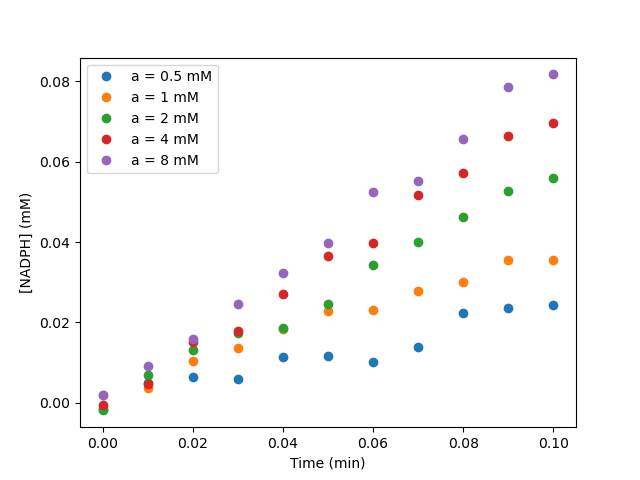

In [3]:
fig, ax = plt.subplots()
ax.plot(a0_5b24.Time, a0_5b24.NADPH, 'o', label='a = 0.5 mM')
ax.plot(a1b24.Time, a1b24.NADPH, 'o', label='a = 1 mM')
ax.plot(a2b24.Time, a2b24.NADPH, 'o', label='a = 2 mM')
ax.plot(a4b24.Time, a4b24.NADPH, 'o', label='a = 4 mM')
ax.plot(a8b24.Time, a8b24.NADPH, 'o', label='a = 8 mM')
ax.set_xlabel('Time (min)')
ax.set_ylabel('[NADPH] (mM)')
ax.legend()

5 marks for the plot where $b$ was varied. Make sure axis labels and legend are there, if not deduct a mark for each.

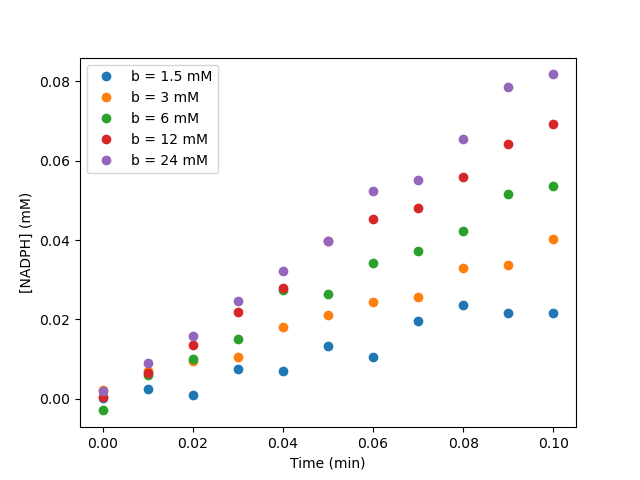

In [4]:
fig, ax = plt.subplots()
ax.plot(a8b1_5.Time, a8b1_5.NADPH, 'o', label='b = 1.5 mM')
ax.plot(a8b3.Time, a8b3.NADPH, 'o', label='b = 3 mM')
ax.plot(a8b6.Time, a8b6.NADPH, 'o', label='b = 6 mM')
ax.plot(a8b12.Time, a8b12.NADPH, 'o', label='b = 12 mM')
ax.plot(a8b24.Time, a8b24.NADPH, 'o', label='b = 24 mM')
ax.set_xlabel('Time (min)')
ax.set_ylabel('[NADPH] (mM)')
ax.legend()

### Question 2 (5 marks)

5 marks for performing the linear regressions.

In [5]:
rega0b0 = sp.stats.linregress(a0b0)
rega0_5b24 = sp.stats.linregress(a0_5b24)
rega1b24 = sp.stats.linregress(a1b24)
rega2b24 = sp.stats.linregress(a2b24)
rega4b24 = sp.stats.linregress(a4b24)
rega8b24 = sp.stats.linregress(a8b24)
rega8b1_5 = sp.stats.linregress(a8b1_5)
rega8b3 = sp.stats.linregress(a8b3)
rega8b6 = sp.stats.linregress(a8b6)
rega8b12 = sp.stats.linregress(a8b12)

Check one or two of the regressions.

In [6]:
rega8b24

LinregressResult(slope=0.8250788434733143, intercept=0.00028478787459591814, rvalue=0.997321721156692, pvalue=1.5527420215041547e-11, stderr=0.020169300031758045, intercept_stderr=0.0011932318815715422)

### Question 3 (10 marks)

There may be more ways to do this, below I have illustrated one way. The most important thing is that the dataframe that you get out must have the **correct structure** (in terms of columns) and the **correct values**.

In [7]:
a_vals = [0, 0.5, 1, 2, 4, 8, 8, 8, 8, 8]
b_vals = [0, 24, 24, 24,24, 24, 1.5, 3, 6, 12]

In [8]:
regressions = [rega0b0, rega0_5b24, rega1b24, rega2b24, rega4b24, rega8b24, rega8b1_5, rega8b3, rega8b6, rega8b12]
rates = []
for reg in regressions:
    print(reg.slope)
    rates.append(reg.slope)
rates = np.array(rates)

0.004954646341627726
0.24118661159479945
0.3526304449083254
0.5746500696105541
0.7322856639928835
0.8250788434733143
0.25422083243133853
0.3679535702854621
0.556408829374724
0.7012039804663761


In [9]:
rates

array([0.00495465, 0.24118661, 0.35263044, 0.57465007, 0.73228566,
       0.82507884, 0.25422083, 0.36795357, 0.55640883, 0.70120398])

In [10]:
combined = pd.DataFrame({'A': a_vals, 'B': b_vals, 'rate': rates})

**Double check the combined dataframe with the data given below.**

In [11]:
combined

A     B      rate
0  0.0   0.0  0.004955
1  0.5  24.0  0.241187
2  1.0  24.0  0.352630
3  2.0  24.0  0.574650
4  4.0  24.0  0.732286
5  8.0  24.0  0.825079
6  8.0   1.5  0.254221
7  8.0   3.0  0.367954
8  8.0   6.0  0.556409
9  8.0  12.0  0.701204

#### Backup data for Q3

If the person you are grading did not manage to do Q2 and used the provided backup data, they get **5/10** for Q3, **provided that the dataframe is correct**. The cells below capture the backup data from the assignment into a dataframe, for reference.

In [12]:
data_array = np.array(
    [[0, 0, 0],
    [0.5, 24, 0.512],
    [1, 24, 0.816],
    [2, 24, 1.202],
    [4, 24, 1.561],
    [8, 24, 1.747],
    [8, 1.5, 0.603],
    [8, 3, 0.912],
    [8, 6, 1.267],
    [8, 12, 1.558]]
)

In [13]:
combined2 = pd.DataFrame(data_array, columns=['A', 'B', 'rate'])

In [14]:
combined2

A     B   rate
0  0.0   0.0  0.000
1  0.5  24.0  0.512
2  1.0  24.0  0.816
3  2.0  24.0  1.202
4  4.0  24.0  1.561
5  8.0  24.0  1.747
6  8.0   1.5  0.603
7  8.0   3.0  0.912
8  8.0   6.0  1.267
9  8.0  12.0  1.558

### Question 4 (10 marks)

For questions 4 and 5 I have provided answers for both scenarios:
- first for the real initial rates (generated by linear regression)
- then for the backup data

There is **no further penalty** if a student used the backup data. Just continue marking using the relevant section of the memo.

**Start out with a full 10 marks and deduct 1 mark for each mistake**. Pay particular attention to:
- the rate equation is defined correctly
- the `lmfit` `Model` is defined correctly (note the `independent_vars`)
- the fit is setup correctly with including passing through the data for the independent variables $a$ and $b$

If **no units** are provided for the parameters, $-1$ mark.

In [15]:
# irreversible Michaelis-Menten (initial p=0)
def MM(a, b, Vf, Ka, Kb):
    return Vf*a*b/((Ka+a)*(Kb+b))

In [16]:
mymod = Model(MM, independent_vars=('a', 'b'))
mypar = mymod.make_params(Vf=1, Ka=1, Kb=1)
myfit = mymod.fit(combined.rate, mypar, a=combined.A, b=combined.B)
myfit

**Fit results:**    
Vf = 1.206 +- 0.046 mM/min    
Ka = 1.613 +- 0.136 mM    
Kb = 4.899 +- 0.413 mM

#### Backup data for Q4

In [17]:
mymod2 = Model(MM, independent_vars=('a', 'b'))
mypar2 = mymod2.make_params(Vf=1, Ka=1, Kb=1)
myfit2 = mymod2.fit(combined2.rate, mypar, a=combined2.A, b=combined2.B)
myfit2

**Fit results:**    
Vf = 2.427 +- 0.034 mM/min    
Ka = 1.527 +- 0.052 mM    
Kb = 3.653 +- 0.123 mM

### Question 5 (10 marks)

5 marks for each graph. Pay attention that:
- the correct data is plotted for each graph, and the correct model evaluation (i.e. data and model must agree within experimental error)
- axis labels are given, including units
- a legend is given

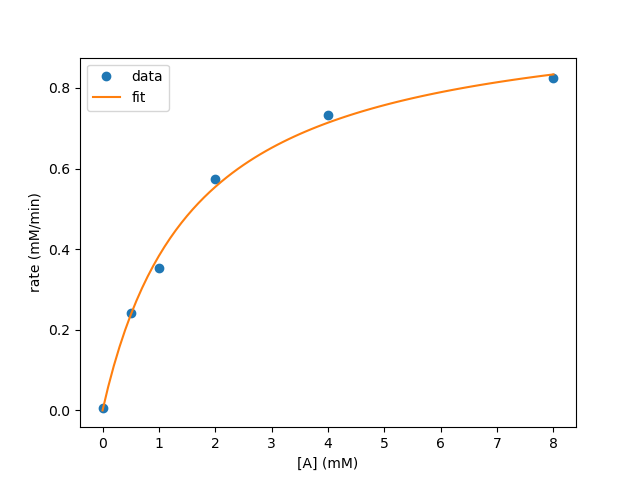

In [18]:
avals = np.linspace(0, 8, 81)
fig, ax = plt.subplots()
varyA = pd.concat((combined[combined.B==0], combined[combined.B==24]))
ax.plot(varyA.A, varyA.rate, 'o', label='data')
ax.plot(avals, myfit.eval(a=avals, b=24), '-', label='fit')
ax.set_xlabel('[A] (mM)')
ax.set_ylabel('rate (mM/min)')
ax.legend()

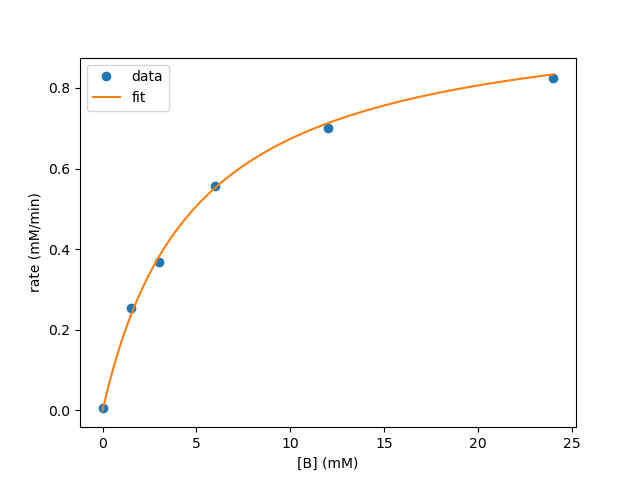

In [19]:
bvals = np.linspace(0, 24, 81)
fig, ax = plt.subplots()
varyB = pd.concat((combined[combined.A==0], combined[combined.A==8]))
ax.plot(varyB.B, varyB.rate, 'o', label='data')
ax.plot(bvals, myfit.eval(a=8, b=bvals), '-', label='fit')
ax.set_xlabel('[B] (mM)')
ax.set_ylabel('rate (mM/min)')
ax.legend()

#### Backup data for Q5

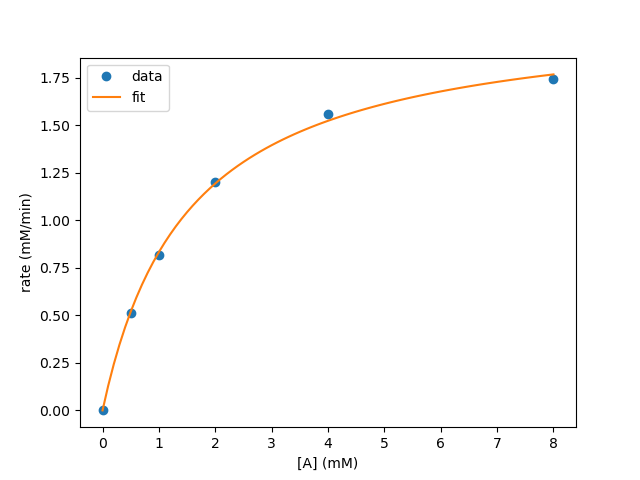

In [20]:
avals = np.linspace(0, 8, 81)
fig, ax = plt.subplots()
varyA = pd.concat((combined2[combined2.B==0], combined2[combined2.B==24]))
ax.plot(varyA.A, varyA.rate, 'o', label='data')
ax.plot(avals, myfit2.eval(a=avals, b=24), '-', label='fit')
ax.set_xlabel('[A] (mM)')
ax.set_ylabel('rate (mM/min)')
ax.legend()

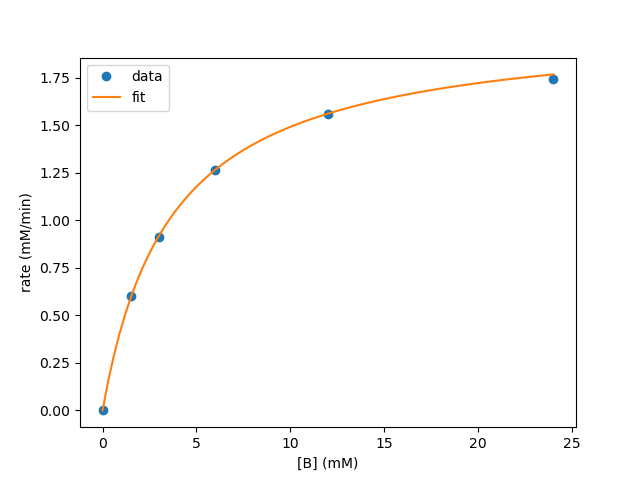

In [21]:
bvals = np.linspace(0, 24, 81)
fig, ax = plt.subplots()
varyB = pd.concat((combined2[combined2.A==0], combined2[combined2.A==8]))
ax.plot(varyB.B, varyB.rate, 'o', label='data')
ax.plot(bvals, myfit2.eval(a=8, b=bvals), '-', label='fit')
ax.set_xlabel('[B] (mM)')
ax.set_ylabel('rate (mM/min)')
ax.legend()